In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb

%matplotlib inline

Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(
    path='imdb.npz', 
    num_words=None, # top most-freq words to use
    skip_top=0,     # top most-freq to ignore
    maxlen=None,    # max sequence len
    seed=217,
    start_char=1,   # 0 will be used for <unk>
    oov_char=2,     # index for cut-off words (due to maxlen)
    index_from=3)   # all other words start at this idx

# Explore Data

In [3]:
[data.shape for data in [X_train, y_train, X_test, y_test]]

[(25000,), (25000,), (25000,), (25000,)]

In [4]:
[np.unique(data) for data in [y_train, y_test]]

[array([0, 1]), array([0, 1])]

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
print('y_train distribution: ', dict(zip(unique, counts)))

y_train distribution:  {0: 12500, 1: 12500}


In [6]:
unique, counts = np.unique(y_test, return_counts=True)
print('y_test distribution: ', dict(zip(unique, counts)))

y_test distribution:  {0: 12500, 1: 12500}


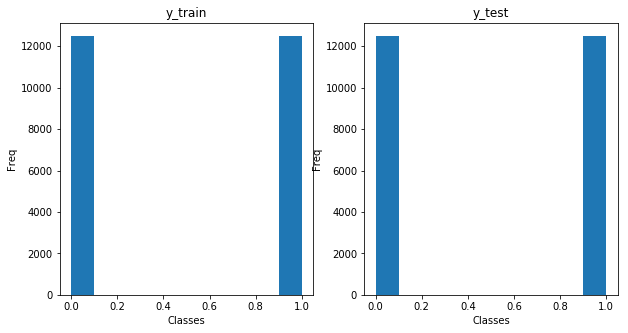

In [7]:
plt.figure(1, figsize=[10, 5])
plt.subplot(121)
plt.hist(y_train)
plt.xlabel('Classes')
plt.ylabel('Freq')
plt.title('y_train')
plt.subplot(122)
plt.hist(y_train)
plt.xlabel('Classes')
plt.ylabel('Freq')
plt.title('y_test');

In [8]:
X_train[0][:10] # words replaced with freq idxs

[1, 13, 219, 14, 22, 11, 61, 438, 707, 13]

In [9]:
[len(x) for x in X_train[:10]] # n words in each review

[211, 125, 244, 177, 81, 190, 181, 139, 242, 344]

In [10]:
word_index = imdb.get_word_index()
type(word_index)

dict

In [11]:
len(word_index)

88584

In [13]:
examples = list(word_index.keys())[:10]
{k: word_index[k] for k in examples}

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008}

In [14]:
reverse_index = {v: k for k, v in word_index.items()}

In [15]:
decoded_review = ' '.join([reverse_index.get(i - 3, '!') 
                           for i in X_train[0]])

In [16]:
decoded_review

"! i saw this film in my cinema class i am glad that i did not pay to see it i came into it with an open mind and was even a little excited i really enjoy ed norton and evan rachel wood and the rest of the cast was interesting i just never connected with this movie the acting was great the cinematography was interesting but the storyline or rather lack thereof was a problem there was no central connecting theme to the movie was it a romance between norton and wood well no not really was it a western kind of but no i'm all for twists in movies i recently saw brick and loved it but the place that this movie went was just too out there it was so weird and if i weren't required to have sat through the whole film i would have walked out the writing wasn't terrible but it was just all over the place by the time this movie ended i was just left terribly confused and wishing that it had ended sooner there was just something about this film that didn't resonate i understand more offbeat films l